Reference:
1. official documentation  
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py  
and  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
2. blog  
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

### Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np 
from sklearn.utils import check_random_state

In [3]:
from sklearn.datasets import fetch_openml
# fetch_openml is new latest sevetral version of sklearn, for version 0.19.0 or older please use fetch_mldata
# optimization algorithm saga is available only to version 0.23.0 or higher
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame=0)

In [4]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(X.shape)
# These are the labels
print(y.shape)

(70000, 784)
(70000,)


### Split dataset into training dataset and testing dataset

In [5]:
# random shuffle the data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [6]:
# split the 70k images into 60k training images and 10k testing images
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=0)

### Showing the Images and Labels 

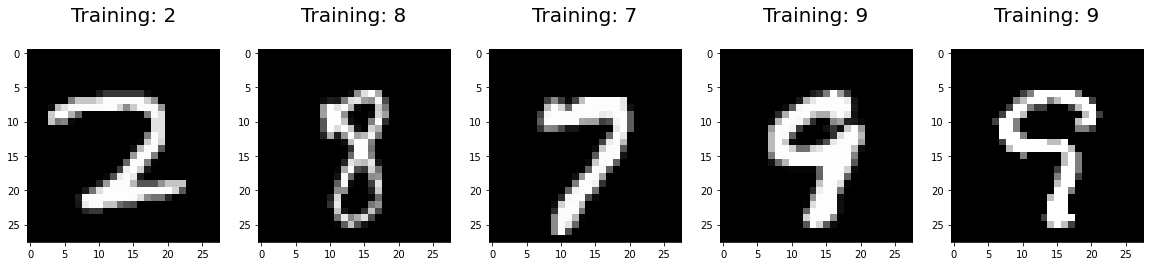

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: {}\n'.format(label), fontsize = 20)

### Fit the Logisitic Model with specified optimization methods

In [8]:
# import model
from sklearn.linear_model import LogisticRegression

In [9]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow, may use sag, saga, lgfbs, 
logisticRegr = LogisticRegression(solver = 'saga')

In [10]:
# train model on training dataset
logisticRegr.fit(train_img, train_lbl)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [11]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1)), test_lbl[0]

(array(['8'], dtype=object), '8')

In [12]:
predictions = logisticRegr.predict(test_img)

### Measuring Model Performance

In [13]:
# Use score method to get accuracy of model
trainscore = logisticRegr.score(train_img,train_lbl)
testscore = logisticRegr.score(test_img, test_lbl)
print('The training error is ',1-trainscore,' and the Testing error is',1-testscore)

The training error is  0.06101666666666672  and the Testing error is 0.07650000000000001


### Display misclassified images with predicted labels

In [14]:
# collect misclassified images
mis_vector = (test_lbl == predictions)
misclassifiedIndexes = np.where(mis_vector == 0)[0]

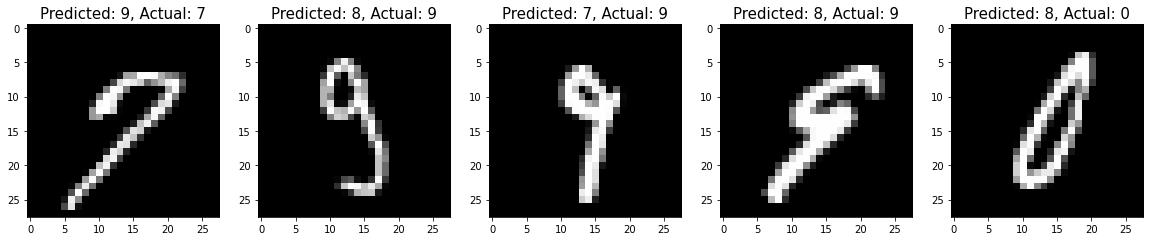

In [15]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [16]:
print('The total # of misclassified images is {}'.format(len(misclassifiedIndexes)))

The total # of misclassified images is 765


# Problem 1
### 5 Images that were correctly classified by the model

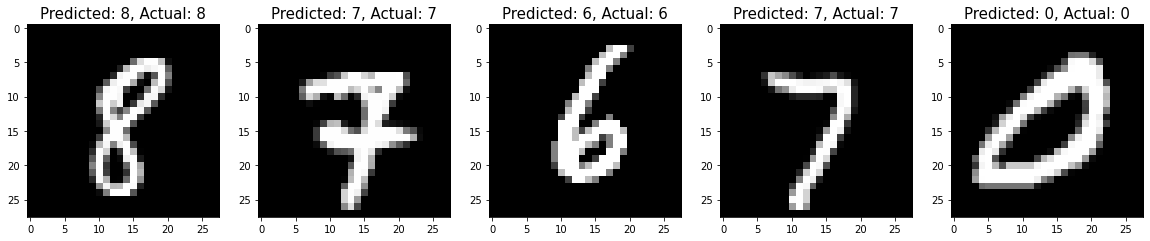

In [17]:
correctclassifiedIndexes = np.where(mis_vector == 1)[0]

plt.figure(figsize=(20,4))
for plotIndex, goodIndex in enumerate(correctclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex + 1)
    plt.imshow(np.reshape(test_img[goodIndex],(28,28)), cmap = plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[goodIndex], test_lbl[goodIndex]), fontsize = 15)

# Problem 2
### Splitting the images into multiple training and test sets

In [18]:
import pandas as pd
#train_img.type
#d = {'Train_Data' : train_img,'Test_Data' : test_img}
#MODEL_DF = pd.DataFrame(data = d)

#Defining a function to split the data, model, and compute training & test error 
def training_log(images,labels,ratio):
    #Splitting the data based off ratio of test/train
    train_img, test_img, train_lbl, test_lbl = train_test_split(images, labels, test_size=ratio, random_state=0)
    #defining the logistical regression 
    logisticRegr = LogisticRegression(solver = 'saga')
    #fitting the regression to the data
    logisticRegr.fit(train_img, train_lbl)
    #computing the training score 
    trainscore = logisticRegr.score(train_img,train_lbl)
    #computing the testing score 
    testscore = logisticRegr.score(test_img, test_lbl)
    return trainscore, testscore, ratio

#60k training and 10k testing images
[trn_e, tst_e, rtio] = training_log(X,y,(1/7))


C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [19]:
print('Training error:',1-trn_e)
print('Testing error:',1-tst_e)

Training error: 0.061033333333333384
Testing error: 0.07679999999999998


In [20]:
#50k training and 20k testing images
[trn_e_2, tst_e_2, rtio_2] = training_log(X,y,(2/7))
print('Training error:',1-trn_e_2)
print('Testing error:',1-tst_e_2)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training error: 0.05925999999999998
Testing error: 0.08209999999999995


In [21]:
#40k training and 30k testing images
[trn_e_3, tst_e_3, rtio_3] = training_log(X,y,(3/7))
print('Training error:',1-trn_e_3)
print('Testing error:',1-tst_e_3)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training error: 0.05587500000000001
Testing error: 0.08440000000000003


In [22]:
#30k training and 40k testing images
[trn_e_4, tst_e_4, rtio_4] = training_log(X,y,(4/7))
print('Training error:',1-trn_e_4)
print('Testing error:',1-tst_e_4)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training error: 0.051899999999999946
Testing error: 0.08725000000000005


In [23]:
#20k training and 50k testing images
[trn_e_5, tst_e_5, rtio_5] = training_log(X,y,(5/7))
print('Training error:',1-trn_e_5)
print('Testing error:',1-tst_e_5)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training error: 0.04415000000000002
Testing error: 0.09101999999999999


In [24]:
#10k training and 60k testing images
[trn_e_6, tst_e_6, rtio_6] = training_log(X,y,(6/7))
print('Training error:',1-trn_e_6)
print('Testing error:',1-tst_e_6)

C:\Users\tbsvb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training error: 0.028900000000000037
Testing error: 0.10003333333333331


[0.06103333 0.05926    0.055875   0.0519     0.04415    0.0289    ]
[10000 20000 30000 40000 50000 60000]


Text(0, 0.5, 'Training Error')

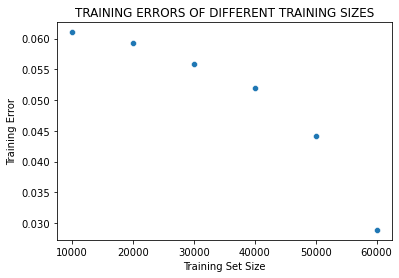

In [25]:
all_TrE = np.zeros(6,dtype = float)
all_TrE[0] = 1 - trn_e
all_TrE[1] = 1 - trn_e_2
all_TrE[2] = 1 - trn_e_3
all_TrE[3] = 1 - trn_e_4
all_TrE[4] = 1 - trn_e_5
all_TrE[5] = 1 - trn_e_6
print(all_TrE)
training_size = np.array([10000, 20000, 30000, 40000, 50000, 60000])
print(training_size)
sns.scatterplot(x = training_size,y = all_TrE)
plt.title('TRAINING ERRORS OF DIFFERENT TRAINING SIZES')
plt.xlabel('Training Set Size')
plt.ylabel('Training Error')

[0.0768     0.0821     0.0844     0.08725    0.09102    0.10003333]


Text(0, 0.5, 'Training Error')

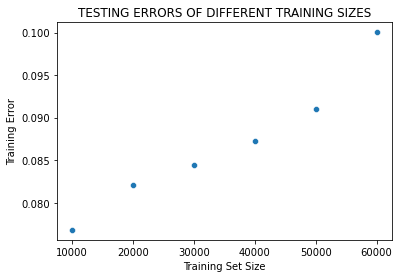

In [26]:
all_Tst = np.zeros(6,dtype = float)
all_Tst[0] = 1 - tst_e
all_Tst[1] = 1 - tst_e_2
all_Tst[2] = 1 - tst_e_3
all_Tst[3] = 1 - tst_e_4
all_Tst[4] = 1 - tst_e_5
all_Tst[5] = 1 - tst_e_6
print(all_Tst)

sns.scatterplot(x = training_size,y = all_Tst)
plt.title('TESTING ERRORS OF DIFFERENT TRAINING SIZES')
plt.xlabel('Training Set Size')
plt.ylabel('Training Error')

# Problem 3 
### Credit card logistic regression 


In [27]:
# reading in the credit card data 
ccdf = pd.read_csv('Default.csv')
ccdf.head()


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


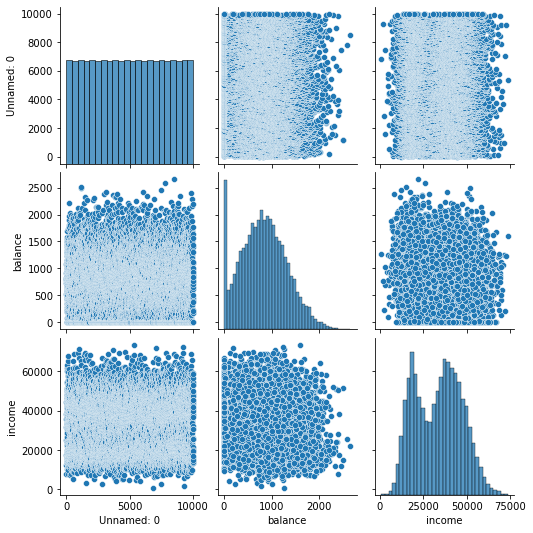

In [28]:
#Plotting the data 
sns.pairplot(ccdf)

In [29]:
#Turning the categorical data into imperical values and 
#getting the predictor matrix made
X_cc = ccdf[['balance', 'income','student']]
X_cc.head()
X_cc = pd.get_dummies(data = X_cc, drop_first=True)
X_cc.head()
cc_pred = X_cc.iloc[:,0:4].values
cc_pred[:,1] = cc_pred[:,1]/1000
print(cc_pred)
#Getting the values for credit card status as imperical values 
Y_cc = ccdf[['default']]
Y_cc = pd.get_dummies(data = Y_cc, drop_first = True)
Y_cc = Y_cc.iloc[:,0].values
print(Y_cc)

[[7.29526495e+02 4.43616251e+01 0.00000000e+00]
 [8.17180407e+02 1.21061347e+01 1.00000000e+00]
 [1.07354916e+03 3.17671389e+01 0.00000000e+00]
 ...
 [8.45411989e+02 5.86361570e+01 0.00000000e+00]
 [1.56900905e+03 3.66691124e+01 0.00000000e+00]
 [2.00922183e+02 1.68629523e+01 1.00000000e+00]]
[0 0 0 ... 0 0 0]


INTERCEPT COEFFICENT: -10.901804583503399
BALANCE COEFFICENT: 0.0057306083783232
INCOME COEFFICENT: 0.003961617411109353
STUDENT COEFFICENT: -0.6125699138814747


Text(0.5, 1.0, 'predicted values off model')

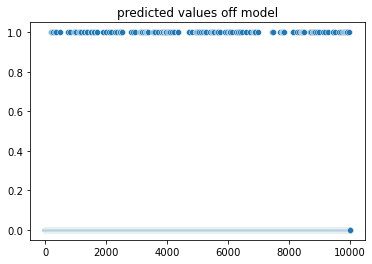

In [32]:
cc_logreg = LogisticRegression(solver = 'lbfgs',fit_intercept = True,multi_class = 'ovr')
cc_logreg.fit(cc_pred,Y_cc)
print('INTERCEPT COEFFICENT:',cc_logreg.intercept_[0])
print('BALANCE COEFFICENT:',cc_logreg.coef_[0,0])
print('INCOME COEFFICENT:',cc_logreg.coef_[0,1])
print('STUDENT COEFFICENT:',cc_logreg.coef_[0,2])

predicted_cc_results = cc_logreg.predict(cc_pred)
axis_cc = np.arange(len(predicted_cc_results))
sns.scatterplot(x = axis_cc,y = predicted_cc_results)
plt.title('predicted values off model')
#print(np.count_nonzero(predicted_cc_results==0))
#print(np.count_nonzero(predicted_cc_results==1))

# Problem 4) finding the false positive and negative rate 

In [38]:
#print('True length:',len(Y_cc))
#print('Predicted length:',len(predicted_cc_results))

#Creating a function to determine false negative and false positive rate for binary sets
def false_pos_neg_rate(true,pred):
    
    false_pos_count = 0
    false_neg_count = 0
    #checking through each instance 
    for i in range(0,len(true)):
        #if the instance is true but should be false 
        if pred[i] == 1:  
            if true[i] == 0:
                false_pos_count = false_pos_count + 1
        #if the instance is false but should be true 
        if pred[i] == 0: 
            if true[i] == 1:
                false_neg_count = false_neg_count + 1
            
    fpos_rate = false_pos_count / (false_pos_count + np.count_nonzero(true == 0))
    fneg_rate = false_neg_count / (sum(true) + false_neg_count)
    
    return fpos_rate, fneg_rate, false_pos_count, false_neg_count
[pos_r,neg_r,pos_c,neg_c] = false_pos_neg_rate(Y_cc,predicted_cc_results)
#print(np.count_nonzero(predicted_cc_results==0))
print('False positive rate:',pos_r*100,'%')
print('False negative rate:',neg_r*100,'%')
print('# of false positives:',pos_c)
print('# of false negatives:',neg_c)

#print(sum(Y_cc))

False positive rate: 0.4120737612032554 %
False negative rate: 40.64171122994652 %
# of false positives: 40
# of false negatives: 228


# Problem 5
### Textbook problem 4.6
X1 = hours studied per week 
X2 = GPA
Y = They get an A
given:
B0 = -6
B1 = 0.05
B2 = 1
### A) P{Receives A |40 hours studying & 3.5 GPA}
X1 = 40, X2 = 3.5

p(x) = e^exponent / (1 + e^exponent) -> probability of receiving an A

exponent = B0 + B1 * X1 + B2 * X2

exponent = -6 + (0.05 * 40) + (1 * 3.5) = -0.5

so p(x) = e^(-0.5) / (1 + e^(-0.5)) = 0.377
therefore the change they get an A is 37.7%

### B) How many hours to get 50% chance of an A?
let p(x) = 0.5 

X1 = ?, X2 = 3.5

exponent = 0.05 * X1 - 2.5

0.5 = e^exponent / ( 1 + e^exponent)

1 + e^exponent = 2 * e^exponent
e^exponent = 1

ln(e^exponent) = ln(1)

exponent = 0

0.05 * X1 - 2.5 = 0

X1 = 2.5 / 0.05

X1 = 50

therfore the sutdent would need to study 50 hours per week to have a 50% chance of getting an A.